# Setup

In [2]:
%load_ext autoreload
%autoreload 2
import main
import matplotlib.pyplot as plt
import utils

# Simple simulation

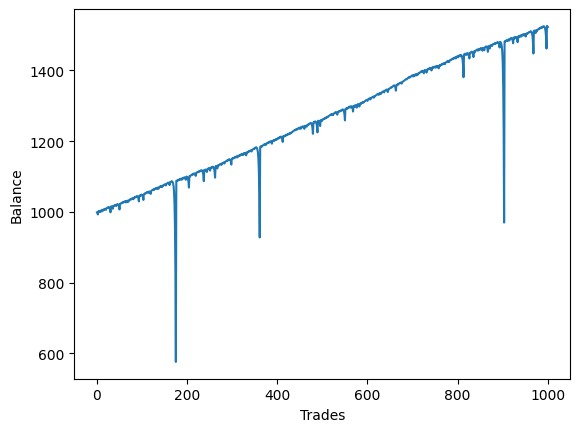

In [15]:
sim = main.simulation_builder(
    start_balance=1000, # starting amount of units
    win_odds=50, # 50% win rate
    start_unit=1, # starting point of with betting
    grow_factor=2, # factor to increase bet size
    max_trades=1000, # maximum number of trades in simulation
)

sim.run()

# Plotting results
balancehistory = []
for tick in sim.timeline:
    balancehistory.append(tick.wallet_balance)
plt.plot(balancehistory)
plt.ylabel('Balance')
plt.xlabel('Trades')
plt.show()

# Gridsearch
finding the best parameters for a certain set of parameters

## The Grid

In [181]:
# Grid space to search for optimal parameters
parm_grid = {
    "start_balance": utils.frange(0, 2000, 100),
    "win_odds": [50],
    "start_unit": utils.frange(1, 1.5, 0.1),
    "grow_factor": utils.frange(1, 3, 0.1),
    "max_trades": [5000]
}

print(parm_grid)

{'start_balance': [0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0], 'win_odds': [50], 'start_unit': [1, 1.1, 1.2, 1.3, 1.4, 1.5], 'grow_factor': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0], 'max_trades': [5000]}


## Sweeping the Grid

In [182]:
run_times = 100 # number of simulations to run for each parameter set
grid_results = []

#perform grid search
for start_balence in parm_grid["start_balance"]:
    for win_odds in parm_grid["win_odds"]:
        for start_unit in parm_grid["start_unit"]:
            for grow_factor in parm_grid["grow_factor"]:
                for max_trades in parm_grid["max_trades"]:
                    print (f"Running simulation with parms: start_balance: {start_balence}, win_odds: {win_odds}, start_unit: {start_unit}, grow_factor: {grow_factor}, max_trades: {max_trades}")

                    parms = {
                        "start_balance": start_balence,
                        "win_odds": win_odds,
                        "start_unit": start_unit,
                        "grow_factor": grow_factor,
                        "max_trades": max_trades
                    }
                    
                    sims: list[main.simulation] = []
                    for i in range(run_times):
                        sims.append(main.simulation_builder(**parms))

                    main.run_parallel_simulations(sims, 20)

                    # calc win and losses
                    wins = 0
                    losses = 0
                    for sim in sims:
                        if sim.status == "finished":
                            wins += 1
                        else:
                            losses += 1
                
                    # calc avg balance
                    total_balance = 0
                    for sim in sims:
                        total_balance += sim.wallet.balance
                    avg_balance = total_balance/run_times

                    grid_results.append({
                        "parms": parms,
                        "wins": wins,
                        "losses": losses,
                        "win_perc": wins/run_times,
                        "avg_balance": avg_balance
                    })



Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1, max_trades: 5000
Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1.1, max_trades: 5000
Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1.2, max_trades: 5000
Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1.3, max_trades: 5000
Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1.4, max_trades: 5000
Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1.5, max_trades: 5000
Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1.6, max_trades: 5000
Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1.7, max_trades: 5000
Running simulation with parms: start_balance: 0, win_odds: 50, start_unit: 1, grow_factor: 1.8, ma

## Plotting the results of the gridsearch

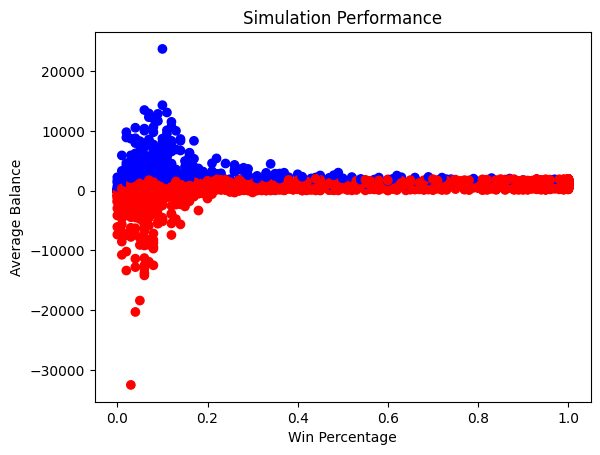

In [205]:

win_percentages = []
avg_balances = []
color = []

for result in grid_results:
    win_percentages.append(result["win_perc"])
    avg_balances.append(result["avg_balance"])
    

    # if avg_balance is lower than the start balance, color red
    if result["avg_balance"] < result["parms"]["start_balance"]:
        color.append("red")
    else:
        color.append("blue")
    


plt.scatter(win_percentages, avg_balances, c=color)
plt.xlabel('Win Percentage')
plt.ylabel('Average Balance')

# Zoom graph
# plt.ylim(bottom=0)
# plt.xlim(left=0.9)

plt.title('Simulation Performance')
plt.show()


## Finding the best parameters

In [210]:
for result in grid_results:
    if result["win_perc"] > 0.9 and result["avg_balance"] > result["parms"]["start_balance"]:
        print(result)

{'parms': {'start_balance': 1500.0, 'win_odds': 50, 'start_unit': 1.4, 'grow_factor': 1.7, 'max_trades': 5000}, 'wins': 86, 'losses': 14, 'win_perc': 0.86, 'avg_balance': 1670.3460166959608}
{'parms': {'start_balance': 1700.0, 'win_odds': 50, 'start_unit': 1, 'grow_factor': 1.7, 'max_trades': 5000}, 'wins': 90, 'losses': 10, 'win_perc': 0.9, 'avg_balance': 1783.0884561341873}
{'parms': {'start_balance': 1800.0, 'win_odds': 50, 'start_unit': 1, 'grow_factor': 1.7, 'max_trades': 5000}, 'wins': 87, 'losses': 13, 'win_perc': 0.87, 'avg_balance': 1803.062637672445}
{'parms': {'start_balance': 1800.0, 'win_odds': 50, 'start_unit': 1, 'grow_factor': 1.8, 'max_trades': 5000}, 'wins': 83, 'losses': 17, 'win_perc': 0.83, 'avg_balance': 2112.8745798843242}
{'parms': {'start_balance': 1800.0, 'win_odds': 50, 'start_unit': 1.5, 'grow_factor': 1.7, 'max_trades': 5000}, 'wins': 81, 'losses': 19, 'win_perc': 0.81, 'avg_balance': 1802.6687902742153}
{'parms': {'start_balance': 1900.0, 'win_odds': 50, '